In [67]:
import pandas as pd
import quantstats as qs
from pandas_datareader import data as pdr
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
yf.pdr_override()

In [68]:
df = pdr.get_data_yahoo('WEGE3.SA')[['Adj Close']]
df

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2000-01-03,0.123841
2000-01-04,0.119495
2000-01-05,0.119495
2000-01-06,0.108631
2000-01-07,0.108631
...,...
2023-01-16,37.689999
2023-01-17,38.310001
2023-01-18,37.990002


In [69]:
df_mensal = df.resample('M').last()
df_retornos_mensal = df_mensal.pct_change()


ultima_linha = df_retornos_mensal.iloc[-1:]

#adicionando uma linha
df_retornos_mensal = df_retornos_mensal.append(ultima_linha)

#excluindo uma linha
df_retornos_mensal = df_retornos_mensal.drop("2023-01-31", axis = 0)




df_retornos_mensal = df_retornos_mensal.fillna(0)

df_retornos_mensal = df_retornos_mensal[1:]
df_retornos_mensal

,Adj Close
Date,
2000-02-29,-0.090910
2000-03-31,0.000000
2000-04-30,0.000000
2000-05-31,-0.049997
2000-06-30,0.000000
...,...
2022-08-31,0.008916
2022-09-30,0.137732
2022-10-31,0.253267


In [70]:
#pegando dados do ibov

ibovespa = pdr.get_data_yahoo('^BVSP', start = '2000-01-03')['Adj Close']

retornos_ibovespa = ibovespa.resample("M").last().pct_change().dropna()

retornos_ibovespa = retornos_ibovespa[:-1]

[*********************100%***********************]  1 of 1 completed


In [71]:
df_retornos_mensal['ibovespa'] = retornos_ibovespa.values

df_retornos_mensal.style.format({
    'Adj Close': '{:,.2%}'.format,
    'ibovespa': '{:,.2%}'.format
})

,Adj Close,ibovespa
Date,,
2000-02-29 00:00:00,-9.09%,7.76%
2000-03-31 00:00:00,0.00%,0.91%
2000-04-30 00:00:00,0.00%,-12.81%
2000-05-31 00:00:00,-5.00%,-3.74%
2000-06-30 00:00:00,0.00%,11.84%
2000-07-31 00:00:00,0.00%,-1.63%
2000-08-31 00:00:00,18.95%,5.42%
2000-09-30 00:00:00,4.43%,-8.18%
2000-10-31 00:00:00,0.00%,-6.66%


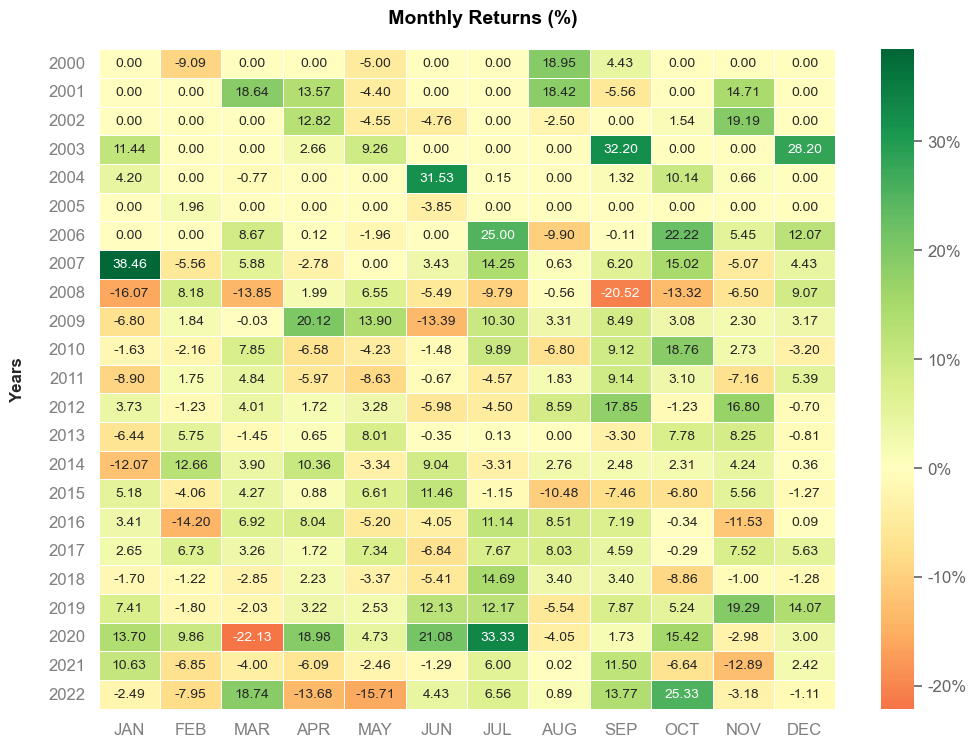

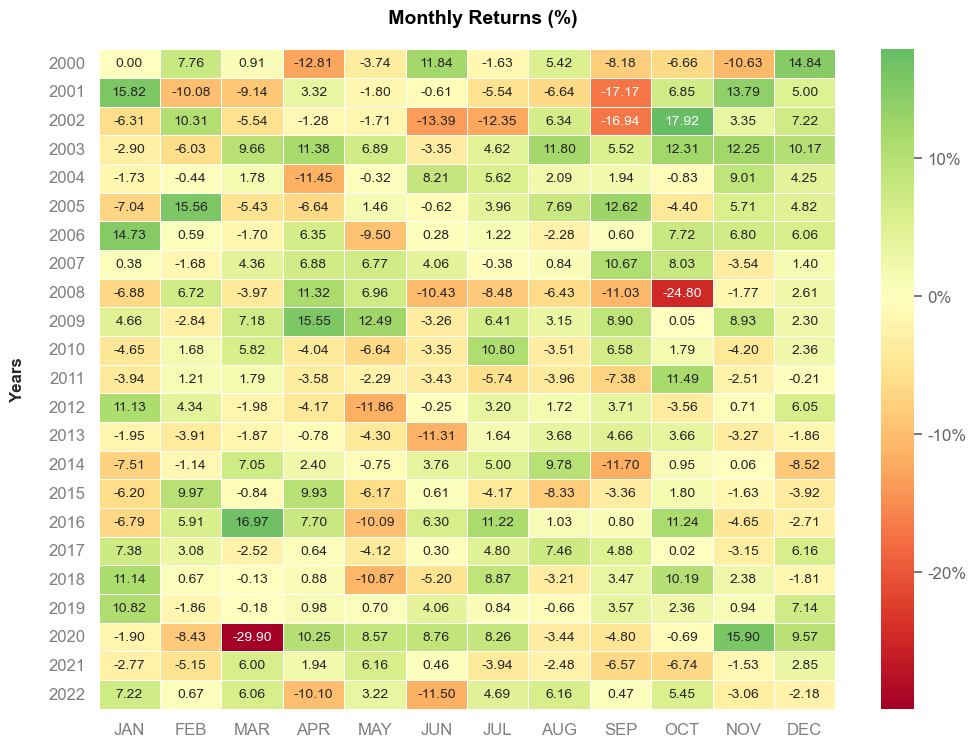

In [72]:
qs.extend_pandas()

df_retornos_mensal['Adj Close'].plot_monthly_heatmap()

df_retornos_mensal['ibovespa'].plot_monthly_heatmap()

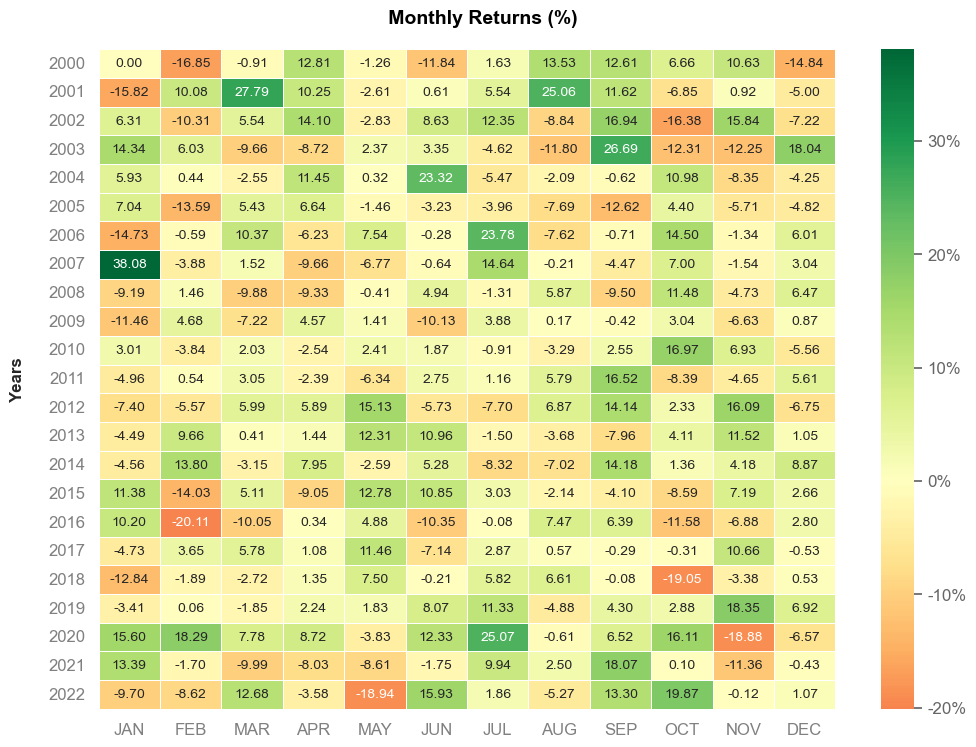

In [73]:
serie_long_short = df_retornos_mensal['Adj Close'] - df_retornos_mensal['ibovespa']

serie_long_short.plot_monthly_heatmap()

In [74]:
#meses batendo o mercado 

retornos_modelo_bateu_mercado = df_retornos_mensal.copy()

retornos_modelo_bateu_mercado['bateu_mercado'] = df_retornos_mensal['Adj Close'] > df_retornos_mensal['ibovespa']

print(retornos_modelo_bateu_mercado)

proporcao_meses_bateu_o_mercado = sum(retornos_modelo_bateu_mercado['bateu_mercado']/len(retornos_modelo_bateu_mercado['bateu_mercado']))
print(proporcao_meses_bateu_o_mercado)

            Adj Close  ibovespa  bateu_mercado
Date                                          
2000-02-29  -0.090910  0.077618          False
2000-03-31   0.000000  0.009060          False
2000-04-30   0.000000 -0.128058           True
2000-05-31  -0.049997 -0.037392          False
2000-06-30   0.000000  0.118406          False
...               ...       ...            ...
2022-08-31   0.008916  0.061629          False
2022-09-30   0.137732  0.004693           True
2022-10-31   0.253267  0.054527           True
2022-11-30  -0.031778 -0.030602          False
2022-12-31  -0.011129 -0.021825           True

[275 rows x 3 columns]
0.5381818181818199


In [75]:
#retorno anual

retorno_anual = df_retornos_mensal.copy()
retorno_anual['Adj Close'] = retorno_anual['Adj Close'] + 1 
retorno_anual['ibovespa'] = retorno_anual['ibovespa'] + 1

retorno_anual["ano"] = retorno_anual.index.year

retorno_anual["retorno_acumulado_ano"] = retorno_anual.groupby('ano')['Adj Close'].cumprod() - 1
retorno_anual["retorno_acumulado_ibov"] = retorno_anual.groupby('ano')['ibovespa'].cumprod() - 1

retorno_anual = retorno_anual.reset_index()

retorno_anual = (retorno_anual.groupby(['ano']).tail(1))[['ano', 'retorno_acumulado_ano', 'retorno_acumulado_ibov']]

retorno_anual.style.format({
    'retorno_acumulado_ano': '{:,.2%}'.format,
    'retorno_acumulado_ibov': '{:,.2%}'.format})


,ano,retorno_acumulado_ano,retorno_acumulado_ibov
10,2000,7.27%,-6.89%
22,2001,65.25%,-11.02%
34,2002,21.03%,-17.01%
46,2003,111.86%,97.34%
58,2004,53.00%,17.81%
70,2005,-1.96%,27.71%
82,2006,73.33%,32.93%
94,2007,93.85%,43.65%
106,2008,-49.37%,-41.22%
118,2009,51.20%,82.66%


In [76]:
cumulative_ret_modelo = (df_retornos_mensal['Adj Close'] + 1).cumprod() - 1

cumulative_ret_ibov = (df_retornos_mensal['ibovespa'] + 1).cumprod() - 1

df_acumulado = pd.DataFrame(data = {"retorno_acum_WEGE3": cumulative_ret_modelo, "retorno_acum_ibov" : cumulative_ret_ibov }, index = cumulative_ret_modelo.index)

df_acumulado = df_acumulado.resample("Y").last()

df_acumulado = df_acumulado[['retorno_acum_WEGE3', 'retorno_acum_ibov']]

df_acumulado.style.format({
    'retorno_acum_WEGE3': '{:,.2%}'.format,
    'retorno_acum_ibov': '{:,.2%}'.format
})

,retorno_acum_WEGE3,retorno_acum_ibov
Date,,
2000-12-31 00:00:00,7.27%,-6.89%
2001-12-31 00:00:00,77.27%,-17.15%
2002-12-31 00:00:00,114.55%,-31.24%
2003-12-31 00:00:00,354.55%,35.68%
2004-12-31 00:00:00,595.46%,59.85%
2005-12-31 00:00:00,581.82%,104.15%
2006-12-31 00:00:00,"1,081.82%",171.38%
2007-12-31 00:00:00,"2,190.92%",289.83%
2008-12-31 00:00:00,"1,059.92%",129.13%


<AxesSubplot:xlabel='Date'>

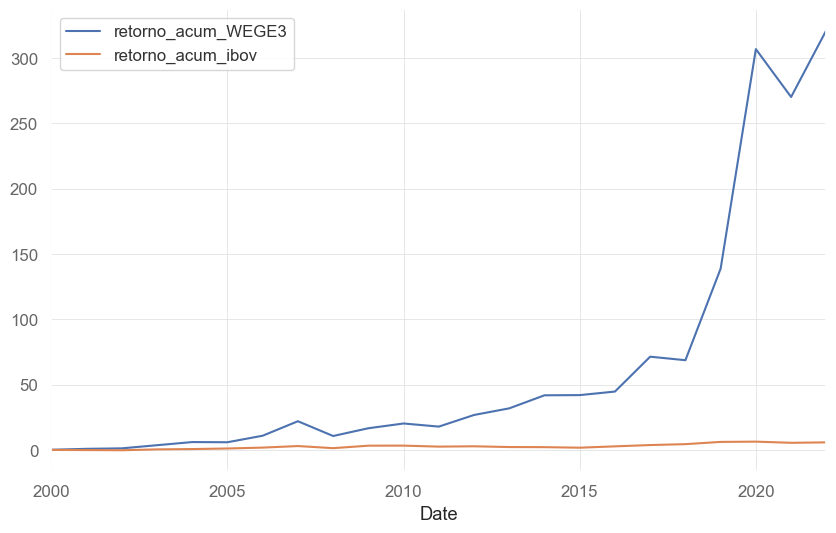

In [77]:
df_acumulado.plot()